Bibliotecas

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import utils
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler
from pathlib import Path  
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import tensorflow.keras.utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score

Associar Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Ler Dados

In [4]:
df = pd.read_csv('/content/drive/My Drive/DATABASES/predictive_maintenance.csv')

Analisar dados

In [ ]:
# to do: code to explore the dataset
#print(df.shape)
#print(df.info)
#print(df.describe())
#print(df.isnull().sum())
#print(df.count)
#print(df.groupby)

#print(df['winery'].shape)
#print(df['wine'].shape)
#print(len(pd.unique(df['wine'])))
#print(len(pd.unique(df['type'])))
#print(df['type'].min())
#print(df.shape) 

#df.head(5)
#print(df.corr())
#df.corr()
#pd.crosstab(df.Type, df.Target)
#pd.crosstab(df.Air_temperature, df.Target)
#print(df['Air_temperature'].min())
#print(df['Rotational_speed'].max())

<ipython-input-4-6275a21df0c7>:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,UDI,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892
Air_temperature,0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process_temperature,0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational_speed,-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque,0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool_wear,-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


Passar Failure Type de Categórico para Numérico (Failure Type)


In [ ]:
lab = preprocessing.LabelEncoder()
print(df['Failure_Type'].value_counts())

typep=lab.fit_transform(df['Failure_Type'])
typep=pd.DataFrame(typep.reshape(-1,1))
df=df.drop('Failure_Type',axis=1)
typep=typep.rename(columns={0: 'Failure_Type'})
df=pd.concat([df,typep],axis=1)
print(df['Failure_Type'].value_counts())

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure_Type, dtype: int64
1    9652
0     112
3      95
2      78
5      45
4      18
Name: Failure_Type, dtype: int64


Remover features desnecessárias e categóricas


In [5]:
df.drop('UDI',axis=1,inplace=True)
df.drop('Product_ID',axis=1,inplace=True)
df.drop('Type',axis=1,inplace=True)

Normalizar os dados

In [6]:

df['Air_temperature']=(df['Air_temperature']-df['Air_temperature'].min())/(df['Air_temperature'].max()-df['Air_temperature'].min())
df['Process_temperature']=(df['Process_temperature']-df['Process_temperature'].min())/(df['Process_temperature'].max()-df['Process_temperature'].min())
df['Rotational_speed']=(df['Rotational_speed']-df['Rotational_speed'].min())/(df['Rotational_speed'].max()-df['Rotational_speed'].min())
df['Torque']=(df['Torque']-df['Torque'].min())/(df['Torque'].max()-df['Torque'].min())
df['Tool_wear']=(df['Tool_wear']-df['Tool_wear'].min())/(df['Tool_wear'].max()-df['Tool_wear'].min())

Visualizar os dados

In [ ]:
df.plot(kind='hist')
df.hist(column='Air_temperature')
df.hist(column='Process_temperature')
df.hist(column='Rotational_speed')
df.hist(column='Torque')
df.hist(column='Tool_wear')

plt.show()

Correlation Plots

In [ ]:
# criar uma matriz de correlação
matriz_corr = df.corr()

#gráfico de correlação
sns.heatmap(matriz_corr, annot=True)
plt.show()

Pairplot

In [ ]:
sns.pairplot(df, hue ='Failure_Type')

#sns.pairplot(df, hue ='Target')

Dividir dados em Train e Test

In [ ]:
#df.drop('Rotational_speed',axis=1,inplace=True)
#df.drop('Process_temperature',axis=1,inplace=True)
y=df['Target']
X1=df.drop('Target',axis=1)

X=X1.drop('Failure_Type',axis=1)
X_train,X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=44)

Fazer oversampling 10% / 20% (Target)

In [ ]:
#10%
oversample = RandomOverSampler(sampling_strategy=0.1)

In [ ]:
#20%
oversample = RandomOverSampler(sampling_strategy=0.2)

In [ ]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
len(X_train)
y_train.value_counts()

Modelo em que testaremos as alterações de pre-processamento (Target)

In [ ]:
clf=DecisionTreeClassifier(criterion="entropy")#,max_depth=20
classifier = AdaBoostClassifier(estimator=clf,n_estimators=200)
model =classifier.fit(X_train, y_train)
predictions=classifier.predict(X_test)

NN (Target)

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(5,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=250, batch_size=100)
predictions = model.predict(X_test)
predictions = [round(x[0]) for x in predictions]

SVM (Target)

In [ ]:
#r = np.exp(-(X_train ** 2).sum(1))
clf = SVC(kernel='rbf',C=13)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
f1 = f1_score(y_test, predictions, average=None)

[0.70731707 0.98543184 0.71232877 0.66666667 0.         0.        ]


RF (Target)

In [ ]:
rfc = RandomForestClassifier()

param_grid = {'max_depth': [10, 20, 30, 40, None], 'n_estimators': [50, 100, 200, 400]}

def f1_minority(y_true, y_pred):
    f1 = f1_score(y_true, y_pred, average=None)
    return f1.min()
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring=make_scorer(f1_minority)) # or scoring=make_scorer(f1_minority)

grid_search.fit(X_train, y_train)
predictions = grid_search.predict(X_test)

print("Melhor parametros: ", grid_search.best_params_)
print("Melhor f1 score: ", grid_search.best_score_)


Testar resultados (Target)

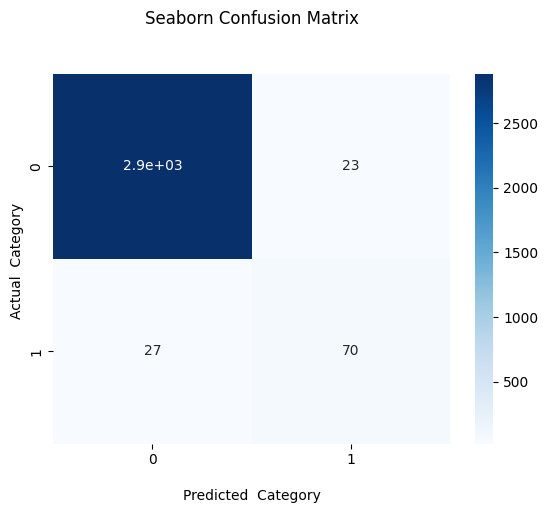

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2903
           1       0.75      0.72      0.74        97

    accuracy                           0.98      3000
   macro avg       0.87      0.86      0.86      3000
weighted avg       0.98      0.98      0.98      3000



In [ ]:
cf_matrix = confusion_matrix(y_test, predictions)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted  Category')
ax.set_ylabel('Actual  Category ');

## Display the visualization of the Confusion Matrix.
plt.show()
print(metrics.classification_report(y_test,predictions))


Dividir dados em Train e Test Failure_Type

In [8]:
y=df['Failure_Type']
X1=df.drop('Target',axis=1)
X=X1.drop('Failure_Type',axis=1)

X_train,X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=44)

Fazer oversampling 10% / 20% (Failure_Type)

In [ ]:

sampling_strategy = {0: 500, 1: 6752, 2: 500, 3: 500, 4: 200,5:200}
oversample = RandomOverSampler(sampling_strategy=sampling_strategy)
  

In [ ]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

Fazer oversampling para NN(Failure_Type)

In [9]:
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.values.reshape(-1,1)).toarray()
y_test = encoder.transform(y_test.values.reshape(-1,1)).toarray()

sampling_strategy = {0: 500, 1: 6752, 2: 500, 3: 500, 4: 200,5:200}
oversample = RandomOverSampler(sampling_strategy=sampling_strategy)

In [10]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

Modelo em que testaremos as alterações de pre-processamento (Failure_Type)

In [ ]:
clf=DecisionTreeClassifier(criterion="entropy")#,max_depth=20
classifier = AdaBoostClassifier(estimator=clf,n_estimators=200)
model =classifier.fit(X_train, y_train)
predictions=classifier.predict(X_test)

NN (Failure_Type)

In [11]:
model = Sequential()
model.add(Dense(100, input_shape=(5,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=40)
predictions = model.predict(X_test)

print(predictions)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)
print(predictions)

SVM (Failure_Type)

In [ ]:

clf = SVC(kernel='rbf',C=13)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
f1 = f1_score(y_test, predictions, average=None)
f1

array([0.70731707, 0.98543184, 0.71232877, 0.66666667, 0.        ,
       0.        ])

RF (Failure_Type)

In [ ]:
rfc = RandomForestClassifier()

param_grid = {'max_depth': [10, 20, 30, 40, None],'n_estimators': [50, 100, 200, 400]}

def f1_avgnew(y_true, y_pred):
    f1 = f1_score(y_true, y_pred, average=None)
    f1_avg=(f1[0]+f1[2]+f1[3]+f1[4]+f1[5])/5
    return f1_avg
def recall_pos(y_true, y_pred):
    recall = recall_score(y_true, y_pred, pos_label=1)
    recall=(recall[0]+recall[2]+recall[3]+recall[4]+recall[5])/5
    return recall
    
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring=make_scorer(recall_pos))#scoring='f1'   make_scorer(f1_avgnew)

grid_search.fit(X_train, y_train)
predictions = grid_search.predict(X_test)

print("Melhores parametros: ", grid_search.best_params_)


Testar resultados (Failure_Type)

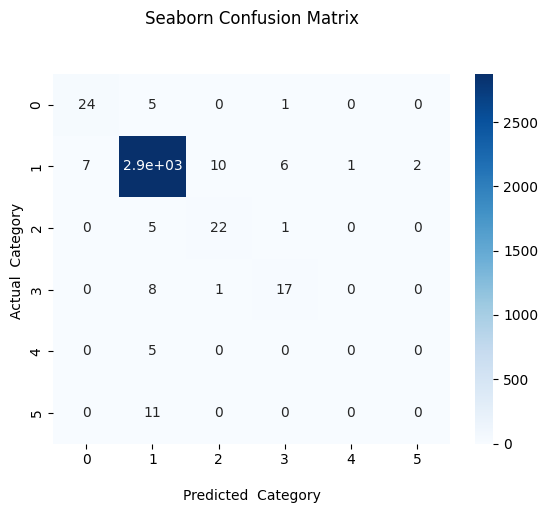

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        30
           1       0.99      0.99      0.99      2900
           2       0.67      0.79      0.72        28
           3       0.68      0.65      0.67        26
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        11

    accuracy                           0.98      3000
   macro avg       0.52      0.54      0.53      3000
weighted avg       0.98      0.98      0.98      3000



In [ ]:
cf_matrix = confusion_matrix(y_test, predictions)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted  Category')
ax.set_ylabel('Actual  Category ');

## Display the visualization of the Confusion Matrix.
plt.show()
print(metrics.classification_report(y_test,predictions))
